In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [22]:
df = pd.read_csv('test/train_data_tree.csv')

In [23]:
X = df.drop('num', axis=1)
y = df.num

In [24]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

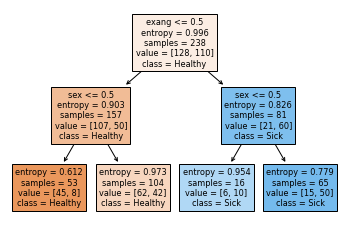

In [29]:
tree.plot_tree(dt, feature_names=list(X), class_names=['Healthy', 'Sick'], filled=True);

In [30]:
0.996 - 157 / 238 * 0.903 - 81 / 238 * 0.826

0.11920588235294122

---
Iris

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
X = iris.data
y = iris.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
dt = DecisionTreeClassifier()

In [37]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
predicted = dt.predict(X_test)

In [40]:
dt.score(X_test, y_test)

0.9473684210526315

---
Кросс-валидация

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
search = GridSearchCV(dt, param_grid={'max_depth': range(1, 11),
                                      'min_samples_split': range(2, 11),
                                      'min_samples_leaf': range(1, 11)})

In [45]:
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [46]:
best_tree = search.best_estimator_

In [47]:
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

In [48]:
search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [52]:
search = RandomizedSearchCV(dt, {'max_depth': range(1, 11),
                                 'min_samples_split': range(2, 11),
                                 'min_samples_leaf': range(1, 11)})

In [53]:
search.fit(X, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [54]:
best_tree = search.best_estimator_

In [55]:
best_tree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=4)

In [56]:
search.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 6}

---
confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, predicted)

array([[3, 1, 8],
       [3, 4, 6],
       [8, 4, 1]])